# <font color=red> Nota:  </font>

# <font color=olive> Ejercicio P1-1 </font> <span style="color:transparent"> EjP1.1 </span>

Escribe un conjunto de funciones apropiadamente general que pueda dibujar flores como en la figura adjunta

![Flores][def]

[def]: flores.png

In [28]:
#Biblioteca

from matplotlib.patches import Ellipse
from math import pi, cos, sin
import matplotlib.pyplot as plt


In [29]:
# Función para dibujar una flor
def dibujar_flores(petalos, radio, largo_petalo, ancho_petalo):
    """
    Dibuja una flor con un número especificado de pétalos y un círculo central.

    Args:
    petalos (int): Número de pétalos de la flor.
    radio (float): Radio del círculo central de la flor.
    largo_petalo (float): Longitud de cada pétalo.
    ancho_petalo (float): Ancho de cada pétalo.
    """
    fig, ax = plt.subplots()
    # Dibujar el círculo central
    center_circle = plt.Circle((0, 0), radio, color='black', fill=False)
    ax.add_patch(center_circle)

    # Dibujar los pétalos alrededor del círculo central
    for i in range(petalos):
        angle = 2 * pi * i / petalos
        x = radio * cos(angle)
        y = radio * sin(angle)
        petal = Ellipse((x, y), largo_petalo, ancho_petalo, angle=angle*180/pi, color='black', fill=False)
        ax.add_patch(petal)

    # Configurar los límites del eje para centrar la figura
    max_radius = radio + largo_petalo/2
    ax.set_xlim(-max_radius, max_radius)
    ax.set_ylim(-max_radius, max_radius)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()



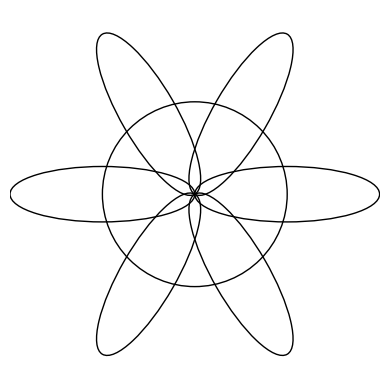

In [30]:
dibujar_flores(petalos=6, radio=0.5, largo_petalo=1, ancho_petalo=0.3)

# <font color=olive> Ejercicio P1-2 </font> <span style="color:transparent"> EjP1.2 </span>
Escribe un conjunto de funciones apropiadamente general que pueda dibujar polígonos regulares con segmentos que unen el centro del polígono con cada uno de los vértices.

In [7]:
#bibliotecas

import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Creamos una figura y un eje
def draw_polygon(n_lados, radio, centro=(0, 0)):
    """
    Esta función dibuja un polígono regular con n lados, y conecta cada vértice con el centro.

    Args:
    n_lados (int): Número de lados del polígono.
    radio (float): El radio del círculo circunscrito alrededor del polígono.
    centro (tuple): Las coordenadas x, y del centro del polígono.
    """
    # Generamos los puntos del polígono
    angulos = np.linspace(0, 2 * np.pi, n_lados, endpoint=False)
    puntos = np.vstack((radio * np.cos(angulos) + centro[0], radio * np.sin(angulos) + centro[1])).T

    # Creamos una figura y un eje
    fig, ax = plt.subplots()

    # Dibujamos el polígono
    polygon = plt.Polygon(puntos, closed=True, fill=None, edgecolor='black')
    ax.add_patch(polygon)

    # Dibujamos las líneas desde el centro a cada vértice
    for point in puntos:
        ax.plot([centro[0], point[0]], [centro[1], point[1]], color='black')

    # Ajustamos los límites del eje para centrar la figura y mostramos el resultado
    ax.set_xlim(-radio-1, radio+1)
    ax.set_ylim(-radio-1, radio+1)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()


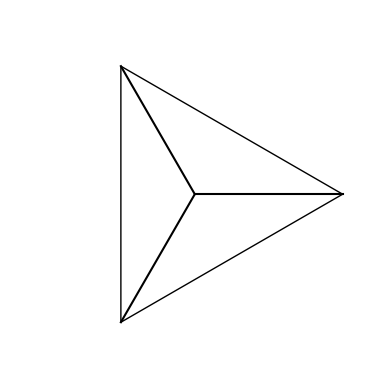

In [15]:
draw_polygon(3, 4, centro=(0, 0))

# <font color=olive> Ejercicio P1-3 </font> <span style="color:transparent"> EjP1.3 </span>

Lee sobre espirales en http://en.wikipedia.org/wiki/Spiral; luego escribe un programa que dibuje una espiral arquimediana (o de otro tipo).

In [19]:
import math

def espiral_arquimediana(vueltas, distancia_vuelta):
    """
    Dibuja una espiral de Arquímedes con un número determinado de vueltas y una distancia entre vueltas.

    Args:
    vueltas (int): Número de vueltas completas que da la espiral.
    distancia_vuelta (float): La distancia entre cada vuelta de la espiral.
    """
    # Generamos los puntos de la espiral
    theta = np.linspace(0, 2 * math.pi * vueltas, 1000)
    r = distancia_vuelta * theta
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Creamos una figura y un eje
    fig, ax = plt.subplots()

    # Dibujamos la espiral
    ax.plot(x, y, color='black')

    # Ajustamos los límites del eje para centrar la figura y mostramos el resultado
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()


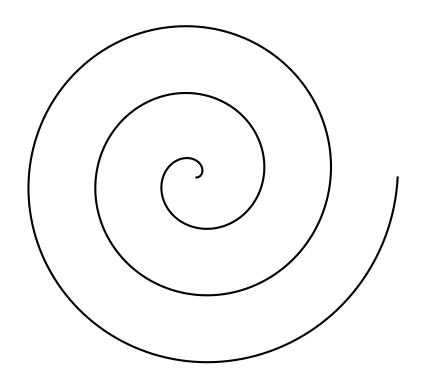

In [20]:
draw_archimedean_spiral(3, 6)

# <font color=olive> Ejercicio P1-4 </font> <span style="color:transparent"> EjP1.4 </span>

Busca información sobre el fractal de Koch y reprodúcelo. Sugerencia: realiza una aproximación recursiva con un límite de recursividad. Simplifica haciendo que la longitud inicial de los lados tenga que ser una potencia de 3.

In [21]:
def fractal_Koch(start, end, iteration):
    if iteration <= 0:
        plt.plot([start[0], end[0]], [start[1], end[1]], color='black')
    else:
        # Calculamos los puntos para el segmento de Koch
        dx = end[0] - start[0]
        dy = end[1] - start[1]
        dist = np.sqrt(dx**2 + dy**2) / 3
        angle = np.arctan2(dy, dx)
        p1 = start
        p2 = (start[0] + dx / 3, start[1] + dy / 3)
        p3 = (p2[0] + dist * np.cos(angle - np.pi/3), p2[1] + dist * np.sin(angle - np.pi/3))
        p4 = (start[0] + 2 * dx / 3, start[1] + 2 * dy / 3)
        p5 = end

        # Llamamos a la función de forma recursiva para cada uno de los cuatro segmentos
        fractal_Koch(p1, p2, iteration-1)
        fractal_Koch(p2, p3, iteration-1)
        fractal_Koch(p3, p4, iteration-1)
        fractal_Koch(p4, p5, iteration-1)

# Dibujamos el fractal completo empezando por una línea base y aplicando la recursión
def draw_koch_fractal(iteration):
    fig, ax = plt.subplots()
    start_point = (0, 0)
    end_point = (1, 0)
    fractal_Koch(start_point, end_point, iteration)
    # Para ver la figura completa, podemos necesitar ajustar los límites de los ejes
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.5, 0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()


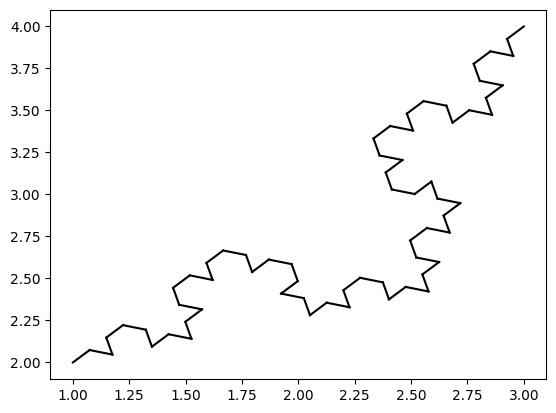

In [34]:
# Llamar a la función fractal_Koch con puntos de inicio y final, y 3 iteraciones
fractal_Koch((1, 2), (3, 4), 3)


# <font color=olive> Ejercicio P1-5 </font> <span style="color:transparent"> EjP1.5 </span>

Este ejercicio no es necesario entregarlo para obtener la máxima nota pero debido a su nivel de complejidad y detalle es un buen ejercicio para mejorar tus habilidades y puede subir la nota en caso de no haberse obtenido la máxima.

Las letras del alfabeto se pueden construir a partir de un número moderado de elementos básicos, como líneas verticales y horizontales y unas pocas curvas. Diseña un alfabeto que pueda ser dibujado con un número mínimo de elementos básicos y luego escribe funciones que dibujen las letras.

Debes escribir una función para cada letra, con nombres como dibujar_a, dibujar_b, etc., y poner tus funciones en un archivo llamado <font color= red>python_evaluable1-ej.py </font>.

In [35]:
def draw_letter_a():
    fig, ax = plt.subplots()
    # Definimos los puntos para la letra 'A'
    points = [(0.2, 0), (0.5, 0.8), (0.8, 0), (0.5, 0.8), (0.3, 0.4), (0.7, 0.4)]
    # Dibujamos la letra 'A'
    for i in range(len(points) - 1):
        plt.plot([points[i][0], points[i+1][0]], [points[i][1], points[i+1][1]], color='black')
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()


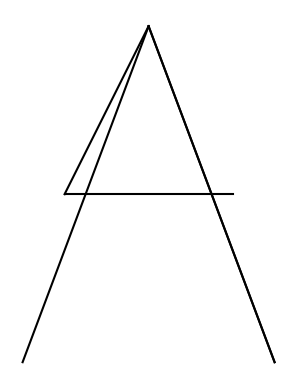

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Definimos los puntos para la letra 'A'
points = [(0.2, 0), (0.5, 0.8), (0.8, 0), (0.5, 0.8), (0.3, 0.4), (0.7, 0.4)]

# Dibujamos la letra 'A'
for i in range(len(points) - 1):
    plt.plot([points[i][0], points[i+1][0]], [points[i][1], points[i+1][1]], color='black')

ax.set_aspect('equal')
ax.axis('off')
plt.show()



# <font color=red> Copyright </font>

$\copyright$ Copyright 2012 Eloy Anguiano Rey - All rights reserved

Queda expresamente prohibida la copia, distribución, modificación o cualquier otro uso de este documento sin permiso del autor.